# Data Preprocessing
Data preprocessing is the process of cleaning, transforming, and organizing a dataset in order to prepare it for data analysis and modeling. It aims to improve the quality, integrity, and reliability of the data, and addresses issues such as missing values, noisy data, outliers, and incompatible data formats.

"Garbage in, garbage out" is a known phrase in data science, which expresses the idea that the quality of the results of a model is determined by the quality of its inputs. The more informative and less noisy the data is, the better the model will be able to learn the underlying patterns or relationships in the data and generalize to new unseen data.

## Data Preprocessing Tasks
The main tasks involved in data preprocessing are:
- Data cleaning
- Handling missing data
- Encoding categorical data
- Detecting and handling outliers
- Handling skewed data
- Discretization
- Scaling and normalization

Feature selection and extraction are considered separate steps from data preprocessing, although there can be some overlap between them.

The main modules in Scikit-Learn that are used for data preprocessing are:
- `sklearn.preprocessing` provides various transformers for scaling, normalization, encoding features, and discretization.
- `sklearn.impute` provides transformers for imputing missing values.

## Data Cleaning
Data cleaning (or cleansing) involves correcting or removing incorrect, inaccurate, inconsistent, irrelevant, or duplicate data from the data set. These issues can arise from various sources, such as:

- Data entry errors (e.g., an invalid postal code, typographical errors)
- Out-of-range values (e.g., a negative product price)
- Corruption in transmitting or storage of the data
- Merging ambiguous data from different sources (e.g., the same customer was stored in two systems with two different addresses)
- Using inconsistent formats for dates, phone numbers, names of states, etc.
- Using inconsistent unit measures (e.g., using both centimeters and feet to measure length)
- Including features that are irrelevant to the analysis, such as user id

Data cleaning is performed using a combination of manual correction operations with automatic processing tools, and often requires domain expertise in order to identify and resolve the inaccuracies and inconsistencies in the data.

## Handling Missing Values
Missing data is one of the most common issues in real-world data sets. It can occur due to various reasons, such as data entry errors, null values in a database, private information, etc. In Python, missing values are typically represented by `NaN` (Not a Number) or None values.

Many machine learning algorithms cannot deal with missing values (exceptions include KNN, Naive Bayes, and decision trees), thus this issue needs to be resolved during the data preparation phase.

Common approaches for dealing with missing data include:
- Remove the samples with missing values. This option is recommended only if there is a small number of such samples.
- Remove features that have a high percentage of missing values.
- Impute the missing values, i.e., replace them with some appropriate fill value, such as the mean or median of the corresponding feature.

Scikit-Learn provides three types of imputers:

1. `SimpleImputer` imputes the missing values using the statistics (e.g., mean, median, or mode) of the feature with the missing values or using a constant value. Its important parameters are:
- `missing_values:` which values are considered to be missing values (defaults to `np.nan`).
- `strategy:` the statistic to use for the imputation. The options are 'mean' (the default), 'median', 'most_frequent' and 'constant'. For categorical features, only the options 'most_frequent' and 'constant' can be used.
- `fill_value:` which constant to use for replacing the missing values (when the chosen strategy is 'constant').

In [3]:
import numpy as np
from sklearn.impute import SimpleImputer

# imputing missing values with the mean of each feature
imputer = SimpleImputer(strategy='mean')

X = [[np.nan, 5, np.nan], [2, 4, 10], [3, np.nan, 5]]
X

[[nan, 5, nan], [2, 4, 10], [3, nan, 5]]

In [4]:
imputer.fit_transform(X)

array([[ 2.5,  5. ,  7.5],
       [ 2. ,  4. , 10. ],
       [ 3. ,  4.5,  5. ]])

2. `IterativeImputer` models each feature with missing values as a function of the other features, in a round-robin fashion. In each iteration, one of the features with missing values is designated as the output $y$, and the other features are treated as the inputs $X$. Then, a regression model is trained on $(X, y)$, and used to predict the missing values of $y$. This process is repeated for `max_iter` imputation rounds.

Important parameters of this transformer:

- `estimator:` the estimator to use for the imputation (the default is BayesianRidge).
- `max_iter:` maximum number of imputation rounds (defaults to 10).
- `initial_strategy:` which strategy to use to initialize the missing values (same as the strategy parameter in SimpleImputer).
- `imputation_order:` the order in which the features will be imputed. Defaults to 'ascending', i.e., from features with the fewest missing values to the most.

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10)

X = [[1, 2], [2, 4], [4, 8], [np.nan, 3], [5, np.nan]]
X

[[1, 2], [2, 4], [4, 8], [nan, 3], [5, nan]]

In [6]:
imputer.fit_transform(X)

array([[ 1.        ,  2.        ],
       [ 2.        ,  4.        ],
       [ 4.        ,  8.        ],
       [ 1.50000846,  3.        ],
       [ 5.        , 10.00000145]])

We can see that the imputer has learned that the second feature is equal to twice of the first one.

3. `KNNImputer` imputes the missing values by using the mean value of the k-nearest neighbors that have a value for the missing feature.

Important parameters of this transformer:

- `n_neighbors:` the number of neighbors to use for the imputation (defaults to 5)
- `weights:` whether to weight the neighbors uniformly (the default) or by the inverse of their distance.
- `metric:` the metric to use for computing the distances. Possible values are 'nan_euclidean' (an Euclidean distance metric that supports missing values) or a custom function.

The following example replaces the missing values with the mean feature value of the two nearest neighbors:

In [7]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

X = [[1, 2, np.nan], [3, 2, 3], [6, np.nan, 5], [7, 8, 10]]
X

[[1, 2, nan], [3, 2, 3], [6, nan, 5], [7, 8, 10]]

In [8]:
imputer.fit_transform(X)

array([[ 1.,  2.,  4.],
       [ 3.,  2.,  3.],
       [ 6.,  5.,  5.],
       [ 7.,  8., 10.]])

## Encoding Categorical Data
Most machine learning models cannot handle categorical features directly, thus these features need to be converted into a numerical format. There are three main approaches for encoding categorical data:

1. **Ordinal encoding** assigns a unique integer value to each category based on the order or ranking of the categories. For example, a categorical feature of `IncomeLevel` with three categories: `Low, Medium` and `High,` could be encoded as 0, 1, and 2, respectively.
2. **One-hot encoding** converts a categorical variable with $n$ categories into $n$ binary features, with one of them 1, and all the others 0. For example, one-hot encoding of the `IncomeLevel` variable would create three binary features: `LowIncome, MediumIncome,` and `HighIncome.` For a sample that belongs to the `HighIncome` category, the `HighIncome` feature would be 1, and the other features would be 0.
3. **Hash encoding** applies a hash function to the categories and converts them into a fixed number of dimensions. It is more memory efficient than one-hot encoding, but different categories may be mapped to the same hash value.

In [9]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

X = [['LowIncome', 'BA'], ['HighIncome', 'PhD'], ['MediumIncome', 'BA']]
X

[['LowIncome', 'BA'], ['HighIncome', 'PhD'], ['MediumIncome', 'BA']]

In [10]:
encoder.fit_transform(X)

array([[1., 0.],
       [0., 1.],
       [2., 0.]])

In [11]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

X = [['LowIncome', 'BA'], ['HighIncome', 'PhD'], ['MediumIncome', 'BA']]
X

[['LowIncome', 'BA'], ['HighIncome', 'PhD'], ['MediumIncome', 'BA']]

In [12]:
encoder.fit_transform(X).toarray()

array([[0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.]])

## Detecting and Handling Outliers
Outliers are data points that significantly deviate from the majority of the data. They can be caused by data entry errors or measurement errors, but they can also represent real anomalous observations.

There are various methods to detect outliers, such as:

1. Using statistical measures such as z-score, which represents the number of standard deviations away from the mean:

$$z = \frac{x - \mu}{\sigma}$$

2. Using plots such as percentile or box-plot. A box-plot visually displays the quartiles and any data points outside a specified range (e.g., 1.5 times the IQR above the upper quartile or below the lower quartile) are considered outliers.

<div style="align:center">
    <img src="media/boxplot.png" width=400>
</div>

3. Density-based clustering methods, such as DBSCAN, can identify outliers based on the density of the data points.
4. Isolation forest is an ensemble-based approach for anomaly detection.

There are also different ways to handle outliers, depending on the nature and extent of the outliers:

- Remove the outliers. This is the simplest approach, but it should be done judiciously, as it can potentially lead to information loss.
- Treat the outliers as missing values and then use one of the aforementioned imputation methods to replace them.
- Capping sets a predefined threshold for extreme values. Any data point that exceeds the threshold is replaced with the threshold value.
- Winsorization sets all the outliers to a specified percentile of the data. For example, a 90% winsorization replaces all the data points above the 95th percentile with the 95th percentile, and all the points below the 5th percentile with the 5th percentile. This approach limits the impact of outliers without completely removing them.
- Use discretization to group the data points into bins, and assign the outliers to a separate bin or to the nearest bin.

## Handling Skewed Data
Skewed data is data that is not symmetrically distributed around the mean and has a long tail toward one direction. Skewness can impact the performance of some machine learning models, which assume a symmetric or even normal distribution of the data (e.g., Gaussian Naive Bayes assumes that the features are normally distributed).

There are several methods to deal with skewed data:

1. Logarithmic transformation: taking the logarithm can help reduce right skewness since it compresses larger values while maintaining the order of the data.
2. Exponential transformation: taking the reciprocal of the data $(y = x^{-1})$ can help reduce left skewness and make the distribution more symmetric.
3. Winsorization: as in outlier handling, winsorization can handle skewness by replacing extreme values with values at a specified percentile.
4. Power transformations involve raising the data to a power, which is determined through maximum likelihood estimation. They can transform the data to a more symmetric and approximately normal distribution.

- Box-Cox transform, which works only with strictly positive values:

$$ x' = \begin{cases}
    \frac{x^{\lambda} - 1}{\lambda} & \lambda \neq 0 \\
    \ln{(x)} & \lambda =0 \\
\end{cases}
$$

- Yeo-Johnson transform, which works with any real value:

$$ x'  \begin{cases}
    \frac{(x+1)^{\lambda} - 1}{\lambda} & \lambda \neq 0, x \ge 0 \\
    \ln{(x+1)} & \lambda = 0, x \ge 0 \\
    - \frac{(x+1)^{2-\lambda} - 1}{2-\lambda} & \lambda \neq 2, x \lt 0 \\
    - \ln{(-x+1)} & \lambda = 2, x \lt 0 \\
\end{cases}
$$

(array([80., 96., 72., 51., 43., 22., 24., 25., 17.,  8.,  9.,  4.,  5.,
         1.,  7.,  5.,  0.,  3.,  3.,  3.,  0.,  3.,  4.,  4.,  0.,  1.,
         1.,  0.,  0.,  1.,  0.,  1.,  3.,  1.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.06249975,  0.3577228 ,  0.65294586,  0.94816892,  1.24339197,
         1.53861503,  1.83383809,  2.12906114,  2.4242842 ,  2.71950726,
         3.01473031,  3.30995337,  3.60517643,  3.90039948,  4.19562254,
         4.4908456 ,  4.78606865,  5.08129171,  5.37651477,  5.67173783,
         5.96696088,  6.26218394,  6.557407  ,  6.85263005,  7.14785311,
         7.44307617,  7.73829922,  8.03352228,  8.32874534,  8.62396839,
         8.91919145,  9.21441451,  9.50963756,  9.80486062, 10.10008368,
        10.39530673, 10.69052979, 10.98575285, 11.2809759 , 11.57619896,
        11.87142202, 12.16664507, 12.46186813, 12.75709119, 13.05231424,
        13.3475373 , 13.64276036, 13.93798341, 14.23320647,

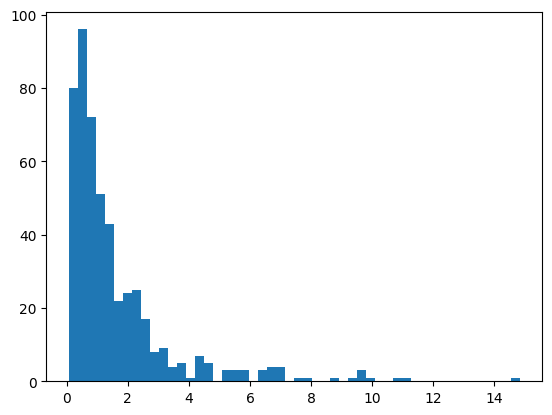

In [13]:
import matplotlib.pyplot as plt

X = np.random.RandomState(0).lognormal(size=500)
plt.hist(X, bins=50)

(array([ 2.,  2.,  1.,  0.,  2.,  2.,  3.,  3.,  1.,  4.,  8.,  6.,  9.,
         7., 12., 13., 16., 11., 17., 24., 11., 25., 26., 17., 23., 18.,
        22., 17., 22., 25., 13., 20., 17., 17., 15., 10., 10.,  5.,  3.,
        10.,  3.,  6.,  6.,  6.,  1.,  2.,  4.,  2.,  0.,  1.]),
 array([-2.78605849, -2.67644406, -2.56682963, -2.4572152 , -2.34760077,
        -2.23798634, -2.12837191, -2.01875748, -1.90914305, -1.79952861,
        -1.68991418, -1.58029975, -1.47068532, -1.36107089, -1.25145646,
        -1.14184203, -1.0322276 , -0.92261317, -0.81299874, -0.70338431,
        -0.59376988, -0.48415545, -0.37454102, -0.26492659, -0.15531216,
        -0.04569773,  0.0639167 ,  0.17353113,  0.28314556,  0.39275999,
         0.50237442,  0.61198885,  0.72160328,  0.83121771,  0.94083215,
         1.05044658,  1.16006101,  1.26967544,  1.37928987,  1.4889043 ,
         1.59851873,  1.70813316,  1.81774759,  1.92736202,  2.03697645,
         2.14659088,  2.25620531,  2.36581974,  2.47543417,

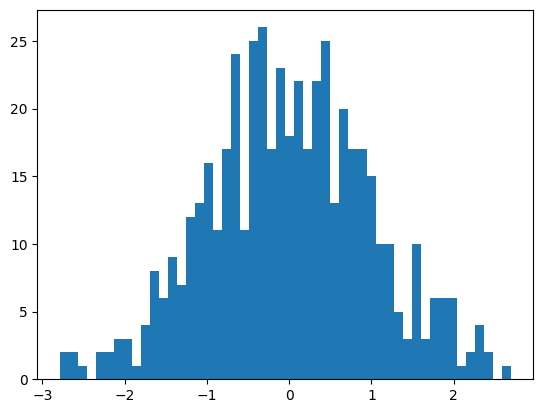

In [14]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer('box-cox')

X_new = pt.fit_transform(X.reshape(-1, 1))
plt.hist(X_new, bins=50)

## Discretization
Discretization transforms a continuous-valued feature into a discrete one by partitioning the range of its values into a set of intervals or bins. The two main methods for discretization are:

1. Equal width/binning: the range of the variable is divided into equal-width bins. For example, if the range of the variable is 0–20 and we want 5 bins, then each bin will cover a range of 4 units (0–4,4–8,8–12,12–16,16–20).
2. Equal frequency: each bin contains the same number of data points.

The discretized values are usually one-hot encoded. For example, if the number of bins is 5, the result of the discretization will be 5 new binary features, where each feature indicates whether the given sample belongs to the corresponding bin.

Use cases for discretization:

- Some machine learning algorithms cannot handle continuous values directly, such as some variants of Naive Bayes and the Apriori algorithm for association rule mining.
- Discretization can make the model more expressive since it allows the model to find a mapping between each interval and the target label. For example, imagine that we need to predict the price of a house given its location, represented by its latitude and longitude. If we use a linear regression model, it can only find a linear correlation between the exact location of the house and its price. However, if we discretize the latitude and longitude into 10 bins each, the model can find a linear correlation between each one of the 100 areas and the price of the house.
- Handle outliers or extreme values by placing them in their own category.

The drawback of discretization is that it can lead to a loss of information, and may introduce bias if the number of bins is too small or their edges are not properly chosen.

## Scaling and Normalization
Many machine learning algorithms do not perform well when the features have different scales. These include distance-based algorithms such as KNN and k-means (since the distances are dominated by features with larger ranges), and algorithms that use gradient descent for optimization, such as neural networks (as different ranges induce different step sizes for each feature).

The goal of feature scaling is to bring all the features to a common scale or range. The most common approaches for feature scaling are:

**Min-max scaling** scales all the features to the same range [min, max], where the typical range is [0, 1]. Mathematically, this transformation can be expressed as:

$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$

**Pros:**
- Brings all the features to the same range.

**Cons:**
- Sensitive to outliers. Since the range of the data is determined by the minimum and the maximum, outliers can cause the scaling to compress the majority of the data into a small range.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = [[-1, 2, 3], [0.5, 6, 10], [0, 1, 8]]
X

[[-1, 2, 3], [0.5, 6, 10], [0, 1, 8]]

In [16]:
scaler.fit_transform(X)

array([[0.        , 0.2       , 0.        ],
       [1.        , 1.        , 1.        ],
       [0.66666667, 0.        , 0.71428571]])

**Standardization** (also known as z-score normalization) subtracts from each feature its mean and scales it to unit variance. The z-score of a sample $x$ is calculated as:

$$x' = \frac{x - \mu}{\sigma}$$

where $\mu$ is the mean of the data points and $\sigma$ is their standard deviation.

**Pros:**
- Transforms the features to have 0 mean and unit variance, which is useful for algorithms that assume standardized features (e.g., PCA assumes that the features are centered around 0).

**Cons:**
- The transformed features may have different ranges.
- Sensitive to outliers, since these can significantly impact the mean and standard deviation (but it is less sensitive to outliers than min-max scaling).

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = [[-1, 2, 3], [0.5, 6, 10], [0, 1, 8]]
X

[[-1, 2, 3], [0.5, 6, 10], [0, 1, 8]]

In [18]:
scaler.fit_transform(X)

array([[-1.33630621, -0.46291005, -1.35873244],
       [ 1.06904497,  1.38873015,  1.01904933],
       [ 0.26726124, -0.9258201 ,  0.33968311]])

**Robust scaling** — similar to standard scaling, but uses statistics that are more robust to outliers: from each feature, it subtracts its median and divides it by its inter-quantile range (IQR, the range between the first quartile and the third quartile).

Mathematically, the transformation can be written as follows:

$$x' = \frac{x - x_{median}}{\text{IQR}}$$

**Pros:**
- Less affected by outliers than standard scaling.

**Cons:**
- Does not normalize the data to have 0 mean and unit variance.
- The transformed features may not have an intuitive interpretation.

In [19]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = [[-1, 2, 3], [0.5, 6, 10], [0, 1, 8]]

In [20]:
scaler.fit_transform(X)

array([[-1.33333333,  0.        , -1.42857143],
       [ 0.66666667,  1.6       ,  0.57142857],
       [ 0.        , -0.4       ,  0.        ]])

## Example: The Titanic Data Set
We will now demonstrate the entire data preprocessing process on the titanic data set, available from Scikit-Learn. This data set describes the survival status of passengers on the Titanic. It contains 1,309 rows and has the following 14 features (including the label):

- `pclass:` the passenger class (1 = 1st, 2 = 2nd, 3 = 3rd), indicates a socio-economic status (1st ~ Upper, 2nd ~ Middle, 3rd ~ Lower)
- `name:` name of the passenger
- `sex:` male or female
- `age:` age in years (can be a fraction if age is less than 1)
- `sibsp:` number of siblings/spouses aboard
- `parch:` number of parents/children aboard
- `ticket:` ticket number
- `fare:` passenger's fare (in British pounds)
- `cabin:` cabin number
- `embarked:` port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- `boat:` the number of lifeboat (if survived)
- `body:` body identification number (if did not survive and body was recovered)
- `home.dest:` home/destination address
- `survival:` the target label (0 = No, 1 = Yes)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)

In [24]:
X, y = fetch_openml('titanic', version=1, return_X_y=True, as_frame=True, parser='auto')

In [25]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB


Before we move to more advanced data exploration, let’s remove the following features, which are not relevant to the prediction task:

- `name` and `ticket` are unique per passenger.
- `cabin`, `boat`, and `body` contain a high percentage of missing values. In addition, 'boat' and 'body' are really part of the target, since we know that any passenger with a lifeboat number survived and any passenger with a body identification number did not survive.
- `home.dest` contains a high percentage of unique values and does not seem to be relevant to the survival of the passenger.

In [27]:
X.drop(['name', 'ticket', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

In [28]:
X.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,1,female,29.0000,0,0,211.3375,B5,S
1,1,male,0.9167,1,2,151.5500,C22 C26,S
2,1,female,2.0000,1,2,151.5500,C22 C26,S
3,1,male,30.0000,1,2,151.5500,C22 C26,S
4,1,female,25.0000,1,2,151.5500,C22 C26,S


<Axes: >

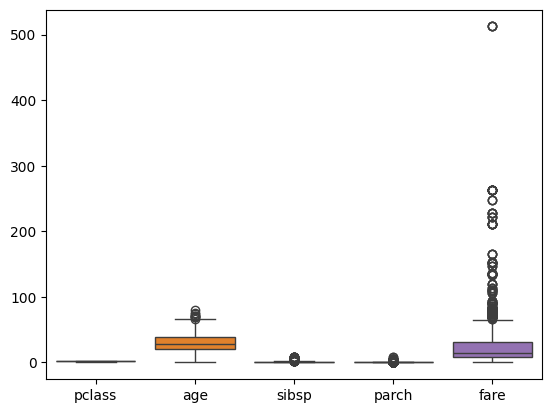

In [30]:
sns.boxplot(data=X)

We can see that there are many outliers in the 'fare' column. This suggests that using a robust scaler to normalize the data would be a better choice than a standard scaler.

Finally, since this is a classification problem, let’s check if it is balanced in terms of the class distribution:

In [31]:
y.value_counts() / y.value_counts().sum()

survived
0    0.618029
1    0.381971
Name: count, dtype: float64

The classes are fairly balanced (61.8% of the passengers did not survive, and 38.2% survived).

Let's identify the tasks we need to perform in order to prepare the data set for modeling:

1. Impute the missing values in the columns 'age' (263 missing values), 'fare' (one missing value), and 'embarked' (two missing values). Note that 'embarked' is a categorical variable, therefore it requires a different imputation strategy. We will use a SimpleImputer with strategy='most_frequent' for the categorical feature, and a KNNImputer (with k = 5) for the numerical features.
2. Encode the categorical features 'pclass', 'sex' and 'embarked' using one-hot encoding.
3. Scale the numerical features 'age', 'sibsp', 'parch' and 'fare' using a robust scaler.

Notice that we need to apply different transformations on the categorical and the numerical features. The basic pipeline in Scikit-Learn does not allow to apply a transformer to only a subset of the features. However, we can combine it with another class called `ColumnTransformer,` which allows different subsets of features to be transformed separately, and then it concatenates them to form a single feature set.

In [32]:
# We first define a pipeline to transform the categorical features:
cat_features = ['pclass', 'sex', 'embarked']

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [33]:
# Next, we define a pipeline to transform the numerical features:
num_features = ['age', 'sibsp', 'parch', 'fare']

num_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler()) 
])

In [34]:
# Now combine the two pipelines using a ColumnTransformer, which associates each pipeline with its corresponding
# set of features

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

Lastly, we build a pipeline that combines the column transformer and our classification model. In this example, we will use a random forest classifier with its default settings:

In [35]:
model = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier())
])

### Train-Test Split
Before training the model, we split the data set into 80% training and 20% test sets:

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex',
                                                   'embarked'])])),
                ('clf', RandomForestClassifier())])

In [38]:
train_acc = model.score(X_train, y_train)
print(f'Train accuracy: {train_acc:.4f}')

test_acc = model.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Train accuracy: 0.9713
Test accuracy: 0.7977


It seems that the model is overfitting the training set to some degree. At this point, we might want to experiment with different transformers and imputers, try to extract new features from the data, and tune the hyperparameters of the model.